In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utilities

# Load input data
input_file = 'data_multivar.txt'
X, y = utilities.load_data(input_file)

In [2]:
# Separate the data into classes
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])

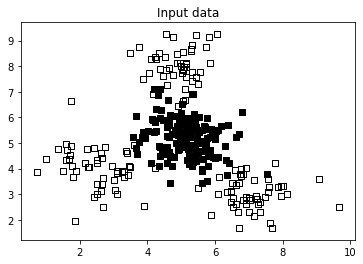

In [3]:
# Plot the data
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], facecolors='black', edgecolors='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], facecolors='None', edgecolors='black', marker='s')
plt.title('Input data')
plt.show()

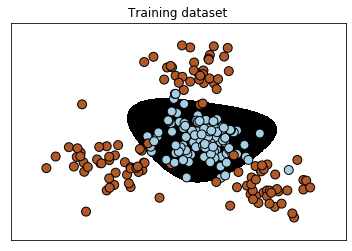

In [4]:
# Train test split and SVM training
from sklearn import model_selection
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=5)

params = {'kernel': 'rbf'}
classifier = SVC(**params)

classifier.fit(X_train, y_train)

utilities.plot_classifier(classifier, X_train, y_train, 'Training dataset')
plt.show()

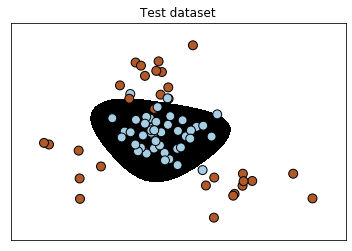

In [5]:
# Check performance on test dataset

y_test_pred = classifier.predict(X_test)
utilities.plot_classifier(classifier, X_test, y_test, 'Test dataset')
plt.show()

In [6]:
# Compute the accuracy for the training set

from sklearn.metrics import classification_report

target_names = ['Class-' + str(int(i)) for i in set(y)]
print ("#"*30)
print ("\nClassifier performance on training dataset")
print (classification_report(y_train, classifier.predict(X_train), target_names=target_names))
print ("#"*30)

       

##############################

Classifier performance on training dataset
              precision    recall  f1-score   support

     Class-0       0.95      0.96      0.96       105
     Class-1       0.97      0.96      0.96       120

    accuracy                           0.96       225
   macro avg       0.96      0.96      0.96       225
weighted avg       0.96      0.96      0.96       225

##############################
